# Setup playground

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

%matplotlib inline

# Playing with noise generators

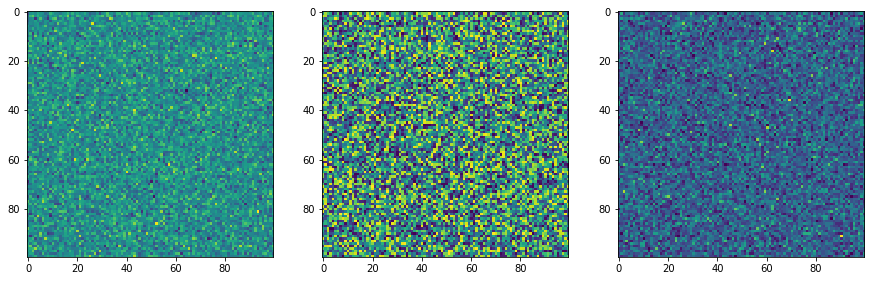

In [2]:
nimg = np.random.normal(0,1,size=[100,100])
uimg = np.random.uniform(-1,1,size=[100,100])
pimg = np.random.poisson(5,size=[100,100])

plt.figure(figsize=[15,8])

plt.subplot(1,3,1)
plt.imshow(nimg)

plt.subplot(1,3,2)
plt.imshow(uimg)

plt.subplot(1,3,3)
plt.imshow(pimg)

# Playing with filters

Text(0.5,1,'Convolve (binomial)')

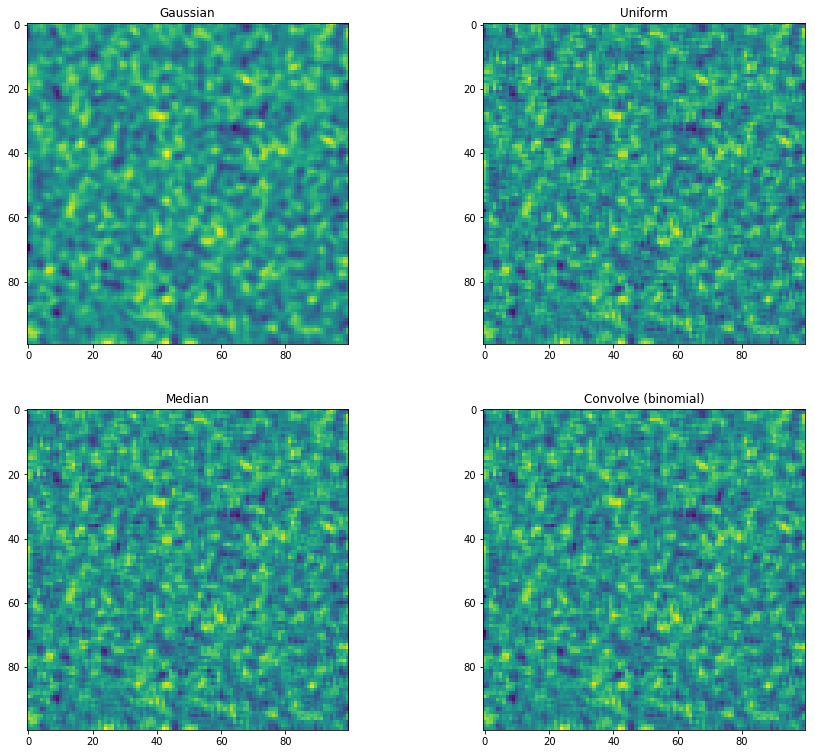

In [3]:
gimg=ndimage.filters.gaussian_filter(nimg,1.0)
fimg=ndimage.filters.uniform_filter(nimg,3)
mimg=ndimage.filters.median_filter(nimg,3)
aimg=ndimage.filters.convolve(nimg,[[1,2,1],[2,4,2],[1,2,1]])

plt.figure(figsize=[15,13])
plt.subplot(2,2,1)
plt.imshow(gimg)
plt.title('Gaussian')

plt.subplot(2,2,2)
plt.imshow(fimg)
plt.title('Uniform')

plt.subplot(2,2,3)
plt.imshow(fimg)
plt.title('Median')

plt.subplot(2,2,4)
plt.imshow(fimg)
plt.title('Convolve (binomial)')

# Demonstrating edge blurring
We want to observe what happens with edges when filtering

## Make test data
The test data is a wedge structure with increasing gap.

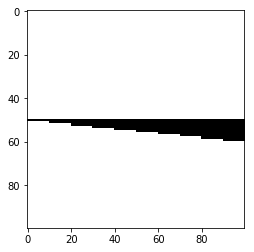

In [4]:
img=np.zeros([100,100])
img[0:50,:]=1
for i in range(img.shape[0]) :
    img[(51+int(i/10)):img.shape[0],i]=1
    
plt.imshow(img,cmap='gray')

## Evaluate under different conditions
 - Add noise of different strength
 - Apply different uniform filter kernels
 - Observe what happens on thresholded data

## Make noisy image

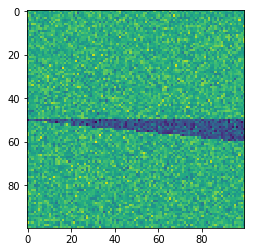

In [5]:
SNR=4
sigma=1/SNR 

noise=np.random.normal(0,sigma,img.shape)
nimg=img+noise
plt.imshow(nimg)

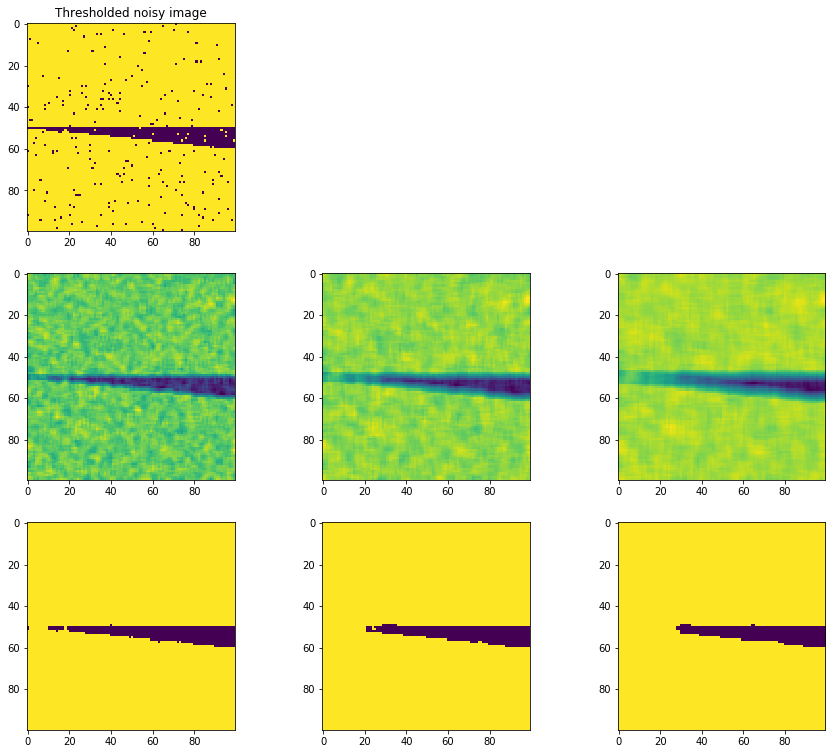

In [6]:
threshold = 0.5 # Threshold for segmentation

fig=plt.figure(figsize=[15,13])
for i in range(3) :
    if (i==0) :
        plt.subplot(3,3,i+1)
        plt.imshow(0.5<nimg)
        plt.title('Thresholded noisy image')
    
    plt.subplot(3,3,3+i+1)
    N=3+i*2
    fimg=ndimage.filters.uniform_filter(nimg,N)
    plt.imshow(fimg)

    plt.subplot(3,3,6+i+1)
    plt.imshow(threshold<fimg)